### **Importing neccesary libraries and Downloading the dataset**

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import random
from IPython.display import Image
from PIL import Image, ImageDraw
import shutil
import sklearn as sk
from sklearn.model_selection import train_test_split

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
%cd yolov5

C:\Users\aseem\Downloads\Calorie\yolov5


In [3]:
!pip install -r requirements.txt 

In [5]:
%cd ..

C:\Users\aseem\Downloads\Calorie


In [6]:
!git clone https://github.com/Liang-yc/ECUSTFD-resized-

Cloning into 'ECUSTFD-resized-'...
Updating files:  53% (3188/5962)
Updating files:  54% (3220/5962)
Updating files:  55% (3280/5962)
Updating files:  56% (3339/5962)
Updating files:  57% (3399/5962)
Updating files:  58% (3458/5962)
Updating files:  59% (3518/5962)
Updating files:  60% (3578/5962)
Updating files:  61% (3637/5962)
Updating files:  62% (3697/5962)
Updating files:  63% (3757/5962)
Updating files:  64% (3816/5962)
Updating files:  65% (3876/5962)
Updating files:  66% (3935/5962)
Updating files:  67% (3995/5962)
Updating files:  68% (4055/5962)
Updating files:  69% (4114/5962)
Updating files:  70% (4174/5962)
Updating files:  71% (4234/5962)
Updating files:  72% (4293/5962)
Updating files:  73% (4353/5962)
Updating files:  74% (4412/5962)
Updating files:  75% (4472/5962)
Updating files:  76% (4532/5962)
Updating files:  77% (4591/5962)
Updating files:  78% (4651/5962)
Updating files:  79% (4710/5962)
Updating files:  80% (4770/5962)
Updating files:  81% (4830/5962)
Updating

In [8]:
path = 'ECUSTFD-resized-\JPEGImages'
arr = os.listdir(path)
print(len(arr))
print(arr)

2978
['apple001S(1).JPG', 'apple001S(2).JPG', 'apple001T(1).JPG', 'apple001T(2).JPG', 'apple002S(1).JPG', 'apple002S(2).JPG', 'apple002S(3).JPG', 'apple002S(4).JPG', 'apple002S(5).JPG', 'apple002S(6).JPG', 'apple002S(7).JPG', 'apple002S(8).JPG', 'apple002T(1).JPG', 'apple002T(2).JPG', 'apple002T(3).JPG', 'apple002T(4).JPG', 'apple002T(5).JPG', 'apple002T(6).JPG', 'apple003S(1).JPG', 'apple003S(2).JPG', 'apple003S(3).JPG', 'apple003S(4).JPG', 'apple003S(5).JPG', 'apple003S(6).JPG', 'apple003T(1).JPG', 'apple003T(2).JPG', 'apple004S(1).JPG', 'apple004S(2).JPG', 'apple004S(3).JPG', 'apple004S(4).JPG', 'apple004T(1).JPG', 'apple004T(2).JPG', 'apple004T(3).JPG', 'apple005S(1).JPG', 'apple005S(5).JPG', 'apple005S(6).JPG', 'apple005T(1).JPG', 'apple005T(5).JPG', 'apple005T(6).JPG', 'apple006S(1).JPG', 'apple006S(2).JPG', 'apple006S(3).JPG', 'apple006S(4).JPG', 'apple006T(1).JPG', 'apple006T(2).JPG', 'apple006T(3).JPG', 'apple006T(4).JPG', 'apple007S(1).JPG', 'apple007S(2).JPG', 'apple007S(3).

### **Loading and Testing the Model**

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\aseem/.cache\torch\hub\master.zip
YOLOv5  2022-6-14 Python-3.9.7 torch-1.10.0 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [10]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [11]:
img = 'ECUSTFD-resized-/JPEGImages/banana013T(1).JPG'

results = model(img)
results.print()

image 1/1: 612x816 1 banana
Speed: 36.0ms pre-process, 3078.0ms inference, 49.0ms NMS per image at shape (1, 3, 480, 640)


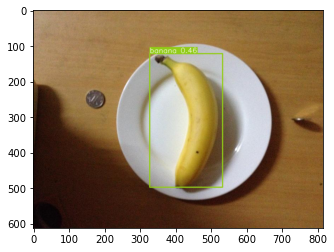

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

### **Making the YOLO Dataset**

In [13]:
import xml.etree.ElementTree as ET 
from tqdm import tqdm

def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [14]:
print(extract_info_from_xml('ECUSTFD-resized-/Annotations/apple001S(1).xml'))

{'bboxes': [{'class': 'apple', 'xmin': 326, 'ymin': 229, 'xmax': 540, 'ymax': 401}, {'class': 'coin', 'xmin': 196, 'ymin': 344, 'xmax': 255, 'ymax': 395}], 'filename': 'apple001S(1).JPG', 'image_size': (816, 551, 3)}


In [15]:
class_name_to_id_mapping = {"coin": 0,
                            "mango": 1,
                            "apple": 2,
                            "plum": 3,
                            "litchi": 4,
                            "sachima": 5,
                            "orange": 6,
                            "peach": 7,
                            "lemon": 8,
                            "pear": 9,
                            "qiwi": 10,
                            "bread": 11,
                            "egg": 12,
                            "doughnut": 13,
                            "banana": 14,
                            "fired_dough_twist": 15,
                            "tomato": 16,
                            "mooncake": 17,
                            "bun": 18,
                            "grape": 19,
                            "mix":20}

In [18]:
%cd ECUSTFD-resized-

C:\Users\aseem\Downloads\Calorie\ECUSTFD-resized-


In [19]:
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("annotations", info_dict["filename"].replace("JPG", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [20]:
# Get the annotations
annotations = [os.path.join('Annotations', x) for x in os.listdir('Annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)
annotations = [os.path.join('Annotations', x) for x in os.listdir('Annotations') if x[-3:] == "txt"]

100%|█████████████████████████████████████████████████████████████████████████████| 2978/2978 [00:09<00:00, 308.42it/s]


In [98]:
random.seed(321)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))
#print(class_id_to_name_mapping)

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("Annotations", "JPEGImages").replace("txt", "JPG")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

NameError: name 'class_name_to_id_mapping' is not defined

In [31]:
# Read images and annotations
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

ValueError: Found input variables with inconsistent numbers of samples: [2981, 2978]

In [32]:
print(len(train_images))
print(len(train_annotations))
print(len(val_images))
print(len(val_annotations))
print(len(test_images))
print(len(test_annotations))

2382
2382
298
298
298
298


In [33]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'JPEGImages/train')
move_files_to_folder(val_images, 'JPEGImages/val/')
move_files_to_folder(test_images, 'JPEGImages/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

### **Training the model on the custom made dataset**

In [9]:
%cd yolov5

C:\Users\aseem\Downloads\Calorie\yolov5


In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.device_count()

1

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3070 Laptop GPU'

In [12]:
!python train.py --img 320 --batch 16 --epochs 50 --data data/data.yaml --weights yolov5s.pt --workers 2 --device 0 

train: weights=yolov5s.pt, cfg=, data=data/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.1-253-g75bbaa8 Python-3.9.7 torch-1.10.0 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

### **Testing the model**

In [6]:
%cd yolov5

C:\Users\aseem\Downloads\Calorie\yolov5


In [2]:
%cd Downloads/Calorie/yolov5

[WinError 3] The system cannot find the path specified: 'Downloads/Calorie/yolov5'
C:\Users\aseem\Downloads\Calorie


In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp4/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\aseem/.cache\torch\hub\master.zip
YOLOv5  2022-6-23 Python-3.9.7 torch-1.10.0 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7064065 parameters, 0 gradients
Adding AutoShape... 


In [8]:
img = 'images/val/pear001T(7).JPG'

In [9]:
results = model(img)

In [10]:
results.print()

image 1/1: 612x816 1 coin, 1 pear
Speed: 28.7ms pre-process, 2352.3ms inference, 37.0ms NMS per image at shape (1, 3, 480, 640)


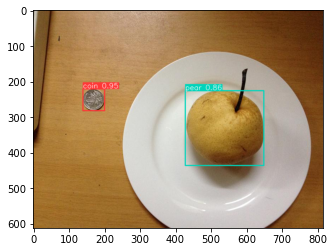

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
results.xywh

[tensor([[170.91644, 251.97488,  61.79820,  61.51746,   0.95410,   0.00000],
         [539.10236, 331.14191, 220.45215, 209.94153,   0.86170,   9.00000]], device='cuda:0')]

### **Calculating Volume**

In [14]:
def get_prediction(top_image,side_image):
    top_results = model(top_image)
    side_results = model(side_image)
    
    fig = plt.figure(figsize=(20, 20))
    rows = 1
    columns = 2
    
    fig.add_subplot(rows, columns, 1)
    plt.imshow(np.squeeze(top_results.render()))
    plt.axis('off')
    plt.title("Top Image")
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(np.squeeze(side_results.render()))
    plt.axis('off')
    plt.title("Side Image")
    
    return top_results, side_results

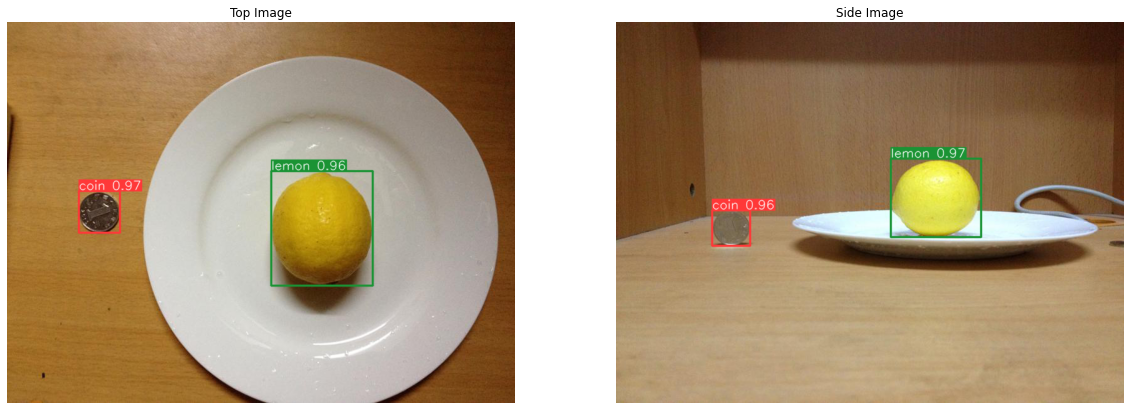

In [15]:
top, side = get_prediction("images1/lemon001T(2).JPG", "images1/lemon001S(2).JPG")

In [16]:
print(top.xywh)
print(side.xywh)

[tensor([[148.32597, 305.37427,  66.55215,  67.22922,   0.97015,   0.00000],
        [505.99805, 331.65341, 162.46121, 183.96216,   0.95690,   8.00000]], device='cuda:0')]
[tensor([[513.88690, 282.29593, 145.11270, 125.47194,   0.96868,   8.00000],
        [185.19308, 330.65417,  60.38794,  56.73215,   0.95608,   0.00000]], device='cuda:0')]


In [17]:
print(top.xywh[0])

tensor([[148.32597, 305.37427,  66.55215,  67.22922,   0.97015,   0.00000],
        [505.99805, 331.65341, 162.46121, 183.96216,   0.95690,   8.00000]], device='cuda:0')


In [18]:
print(len(top.xywh[0]))

2


In [19]:
print(top.xywh[0][0][2])
print(top.xywh[0][0][3])

tensor(66.55215, device='cuda:0')
tensor(67.22922, device='cuda:0')


In [20]:
coin_top_edge = (top.xywh[0][0][2] + top.xywh[0][0][3])/2
print(coin_top_edge)

coin_side_edge = (side.xywh[0][1][2] + side.xywh[0][1][3])/2
print(coin_side_edge)

tensor(66.89069, device='cuda:0')
tensor(58.56004, device='cuda:0')


In [21]:
top_scale_factor = 25/coin_top_edge
print(top_scale_factor)

side_scale_factor = 25/coin_side_edge
print(side_scale_factor)

tensor(0.37374, device='cuda:0')
tensor(0.42691, device='cuda:0')


In [30]:
object_top_length = top_scale_factor * top.xywh[0][1][2]
object_top_breadth = top_scale_factor * top.xywh[0][1][3]
object_side_height = side_scale_factor * side.xywh[0][0][3]
object_side_lenght = side_scale_factor * side.xywh[0][0][2]

print("lenght: ", object_top_length)
print("breadth: ", object_top_breadth)
print("height: ", object_side_height)
print("LENGTH = BREADTH: ", object_side_lenght)


lenght:  tensor(60.71892, device='cuda:0')
breadth:  tensor(68.75477, device='cuda:0')
height:  tensor(53.56551, device='cuda:0')
LENGTH = BREADTH:  tensor(61.95039, device='cuda:0')


In [23]:
volume = object_top_length * object_top_breadth * object_side_height
print(volume)

tensor(223620.73438, device='cuda:0')


In [24]:
volume_in_cm3 = volume/1000
volume_in_cm3 

tensor(223.62074, device='cuda:0')

In [25]:
#Density of the lemon001
density = 0.94

In [26]:
mass_in_gm = density * volume_in_cm3
print(mass_in_gm)

tensor(210.20349, device='cuda:0')


### **Calculating calories**

In [27]:
#But because the lemon is like an elipsoid, it cannot take the entire mass of the cuboid
# So some mass has to reduced inorder for an accurate reading
pctge_error = 0.52
mass_after_error = mass_in_gm * pctge_error
print(mass_after_error)

tensor(109.30581, device='cuda:0')


In [28]:
calories_per_gm = 0.29

In [29]:
final_calories = mass_after_error * calories_per_gm
#final_calories = final_calories.cpu
#final_calories = final_calories.numpy()
print('The calories in this lemon are: ', final_calories)

The calories in this lemon are:  tensor(31.69868, device='cuda:0')
